In [2]:
import requests
import pandas as pd

In [18]:
def fetch_fred_yield(series_id, start_date="2023-01-01", end_date="2023-12-31", api_key="your_api_key"):
    # Define the API URL and parameters here
    FRED_URL_OBS = "https://api.stlouisfed.org/fred/series/observations"
    params_obs = {
        'series_id': series_id,
        'api_key': FRED_API_KEY,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    
    # Make an API request and handle errors
    response = requests.get(FRED_URL_OBS, params = params_obs)
    # Convert response JSON into a DataFrame, setting 'date' as index
    data = response.json()
    df = pd.DataFrame(data['observations'])[['date', 'value']]
    
    # Convert the 'value' column to numeric and rename it based on series_id
    df['value'] = pd.to_numeric(df['value'], errors = 'coerce')
    df.set_index('date', inplace = True)
    
    df.rename(columns={'value': series_id}, inplace=True)
    
    return df

In [19]:
tenor_series_ids = [
    "DGS1MO", "DGS3MO", "DGS6MO", "DGS1",  # Short-term yields
    "DGS2", "DGS3", "DGS5",               # Medium-term yields
    "DGS7", "DGS10", "DGS20", "DGS30"     # Long-term yields
]

In [20]:
# Initialize API key
FRED_API_KEY = 'fa18d1f8129ead8c2ed605f0986c8253'

In [21]:
# Fetch data for each tenor, store in a dictionary of DataFrames
tenors_df = {}
for tenor_id in tenor_series_ids:    
    df_tenor = fetch_fred_yield(tenor_id, "2023-01-01", "2023-12-31", FRED_API_KEY)
    tenors_df[tenor_id] = df_tenor

In [22]:
# Combine all DataFrames into a single DataFrame, joining on the date index
df_combined = pd.concat(tenors_df.values(), axis=1)
print(df_combined)

            DGS1MO  DGS3MO  DGS6MO  DGS1  DGS2  DGS3  DGS5  DGS7  DGS10  \
date                                                                      
2023-01-02     NaN     NaN     NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2023-01-03    4.17    4.53    4.77  4.72  4.40  4.18  3.94  3.89   3.79   
2023-01-04    4.20    4.55    4.77  4.71  4.36  4.11  3.85  3.79   3.69   
2023-01-05    4.30    4.66    4.81  4.78  4.45  4.18  3.90  3.82   3.71   
2023-01-06    4.32    4.67    4.79  4.71  4.24  3.96  3.69  3.63   3.55   
...            ...     ...     ...   ...   ...   ...   ...   ...    ...   
2023-12-25     NaN     NaN     NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2023-12-26    5.53    5.45    5.28  4.83  4.26  4.05  3.89  3.91   3.89   
2023-12-27    5.55    5.44    5.26  4.79  4.20  3.97  3.78  3.81   3.79   
2023-12-28    5.57    5.45    5.28  4.82  4.26  4.02  3.83  3.84   3.84   
2023-12-29    5.60    5.40    5.26  4.79  4.23  4.01  3.84  3.88   3.88   

            DGS20  DGS30

In [23]:
# Print the number of rows in the final DataFrame
num_rows = df_combined.shape[0]
print(f"Number of rows in df_combined: {num_rows}")

Number of rows in df_combined: 260


In [24]:
### 4. Spread Calculation
# Load the file `data/Part 1.bond_yields.xlsx`. For each bond:
# - Calculate its spread over the Treasury curve.
# - If a bond’s WAL (Weighted Average Life) falls between two points on the Treasury curve, use linear interpolation.
bond_data = pd.read_excel("data\Part 1. bonds_yields.xlsx")

In [25]:
print(bond_data)

   Bond ID  WAL (years)  Yield (%)             Sector
0   Bond A          1.0       8.63  Telecommunication
1   Bond B          1.5       7.95   Consumer Staples
2   Bond C          2.2       7.53          Utilities
3   Bond D          3.0       7.71         Financials
4   Bond E          4.0       8.45  Telecommunication
5   Bond F          5.0       7.74   Consumer Staples
6   Bond G          6.2       7.66          Utilities
7   Bond H          8.0       8.03         Financials
8   Bond I          9.0       8.33  Telecommunication
9   Bond J          4.5       7.38   Consumer Staples
10  Bond K          1.3       8.55  Telecommunication
11  Bond L          2.0       7.73   Consumer Staples
12  Bond M          2.8       7.61          Utilities
13  Bond N          3.5       7.75         Financials
14  Bond O          5.3       8.64  Telecommunication
15  Bond P          6.0       7.56   Consumer Staples
16  Bond Q          7.5       7.83          Utilities
17  Bond R          8.5     

In [26]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [27]:
latest_date = df_combined.index.max()
bond_data['date'] = latest_date

In [28]:
print(bond_data)

   Bond ID  WAL (years)  Yield (%)             Sector        date
0   Bond A          1.0       8.63  Telecommunication  2023-12-29
1   Bond B          1.5       7.95   Consumer Staples  2023-12-29
2   Bond C          2.2       7.53          Utilities  2023-12-29
3   Bond D          3.0       7.71         Financials  2023-12-29
4   Bond E          4.0       8.45  Telecommunication  2023-12-29
5   Bond F          5.0       7.74   Consumer Staples  2023-12-29
6   Bond G          6.2       7.66          Utilities  2023-12-29
7   Bond H          8.0       8.03         Financials  2023-12-29
8   Bond I          9.0       8.33  Telecommunication  2023-12-29
9   Bond J          4.5       7.38   Consumer Staples  2023-12-29
10  Bond K          1.3       8.55  Telecommunication  2023-12-29
11  Bond L          2.0       7.73   Consumer Staples  2023-12-29
12  Bond M          2.8       7.61          Utilities  2023-12-29
13  Bond N          3.5       7.75         Financials  2023-12-29
14  Bond O

In [29]:
def calculate_spread(row):

    wal = row['WAL (years)']
    date = row['date']

    if date not in df_combined.index:
        return np.nan
    
    # Treasury curve for the given date
    treasury_curve = df_combined.loc[date]

    x = [1, 2, 3, 5, 7, 10, 20, 30]
    y = treasury_curve[[
        "DGS1", "DGS2", "DGS3", "DGS5", "DGS7", "DGS10", "DGS20", "DGS30"
    ]].values  # Yields

    f = interp1d(x, y, fill_value='extrapolate')

    interpolated_yield = f(wal)
    return row['Yield (%)'] - interpolated_yield

In [30]:
bond_data['Spread'] = bond_data.apply(calculate_spread, axis=1)

In [32]:
import seaborn as sns

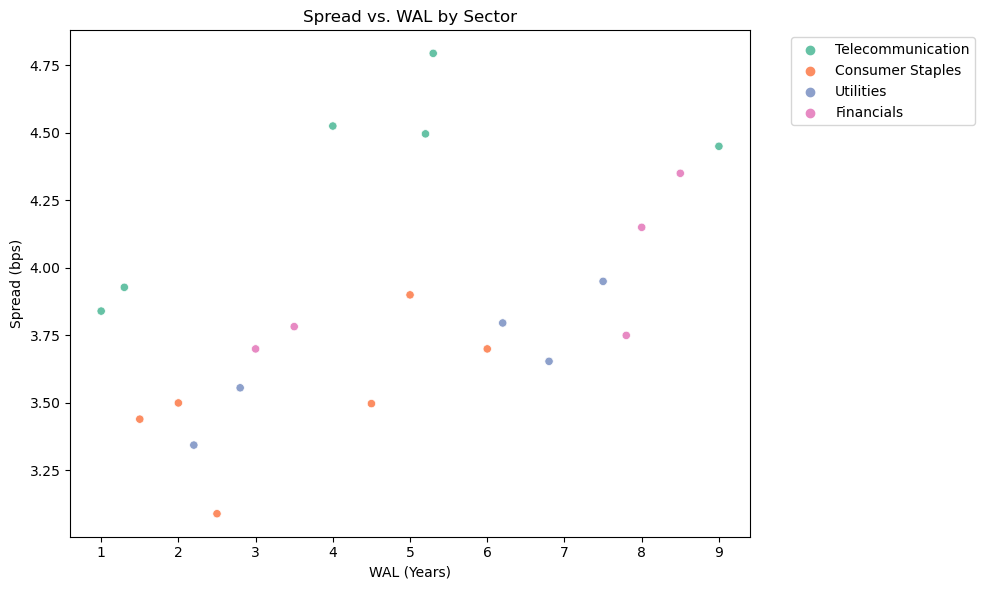

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bond_data, 
                x='WAL (years)', 
                y='Spread', 
                hue='Sector',
                palette='Set2')
plt.title('Spread vs. WAL by Sector')
plt.xlabel('WAL (Years)')
plt.ylabel('Spread (bps)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

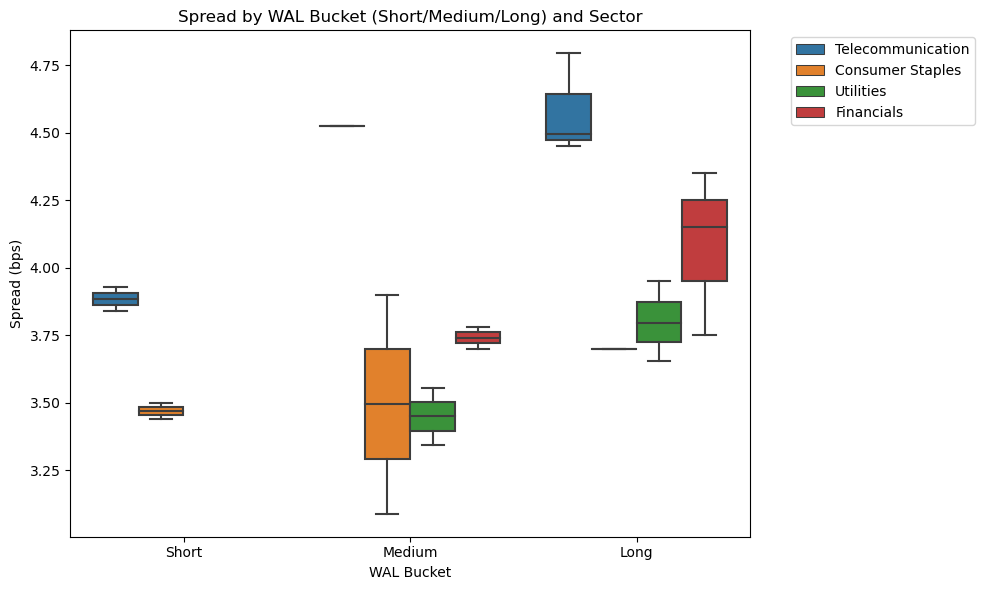

In [34]:
bins = [0, 2, 5, 10]
labels = ['Short', 'Medium', 'Long']
bond_data['WAL_Bin'] = pd.cut(bond_data['WAL (years)'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.boxplot(data=bond_data, x='WAL_Bin', y='Spread', hue='Sector')
plt.title('Spread by WAL Bucket (Short/Medium/Long) and Sector')
plt.xlabel('WAL Bucket')
plt.ylabel('Spread (bps)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

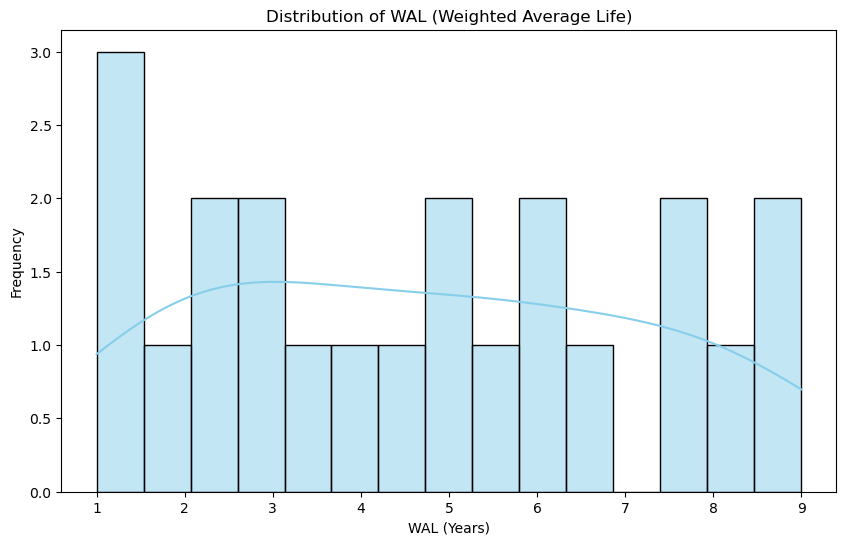

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=bond_data, x='WAL (years)', bins=15, kde=True, color='skyblue')
plt.title('Distribution of WAL (Weighted Average Life)')
plt.xlabel('WAL (Years)')
plt.ylabel('Frequency')
plt.show()


# Part 2: Loan Analysis

In [3]:
# "C:\Users\elise\Code-Assessment\Coding-Assess-main\data\Part 2. loan_data_final.csv"
loan_data = pd.read_csv('data\Part 2. loan_data_final.csv')

In [4]:
# Data exploration
print(loan_data.head())
print(loan_data.isnull().sum())

   Unnamed: 0  person_age person_gender person_education  person_income  \
0           0          22        female           Master          71948   
1           1          21        female      High School          12282   
2           2          25        female      High School          12438   
3           3          23        female         Bachelor          79753   
4           4          24          male           Master          66135   

   person_emp_exp person_home_ownership loan_intent  loan_int_rate  \
0               0                  RENT    PERSONAL          16.02   
1               0                   OWN   EDUCATION          11.14   
2               3              MORTGAGE     MEDICAL          12.87   
3               0                  RENT     MEDICAL          15.23   
4               1                  RENT     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                           3          

In [5]:
loan_data = pd.get_dummies(loan_data, drop_first=True)

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score


In [7]:
loan_data = loan_data.drop(columns=['Unnamed: 0'], errors='ignore')  # Remove unnecessary column
loan_data.head()
print(loan_data.isnull().sum())
num_cols = loan_data.select_dtypes(include=[np.number]).columns
cat_cols = loan_data.select_dtypes(exclude=[np.number]).columns

loan_data[num_cols] = loan_data[num_cols].fillna(loan_data[num_cols].median())
loan_data[cat_cols] = loan_data[cat_cols].fillna('Unknown')

person_age                            0
person_income                         0
person_emp_exp                        0
loan_int_rate                         0
loan_percent_income                   0
cb_person_cred_hist_length            0
credit_score                          0
loan_to_income_ratio                  0
dependents_count                      0
regional_unemployment_rate            0
borrower_risk_score                   0
loan_status                           0
person_gender_male                    0
person_education_Bachelor             0
person_education_Doctorate            0
person_education_High School          0
person_education_Master               0
person_home_ownership_OTHER           0
person_home_ownership_OWN             0
person_home_ownership_RENT            0
loan_intent_EDUCATION                 0
loan_intent_HOMEIMPROVEMENT           0
loan_intent_MEDICAL                   0
loan_intent_PERSONAL                  0
loan_intent_VENTURE                   0


In [8]:
# 1) Bucket credit_score
def bucket_credit_score(score):
    if score < 550:
        return 'Low'
    elif score < 650:
        return 'Medium'
    else:
        return 'High'

loan_data['credit_score_bucket'] = loan_data['credit_score'].apply(bucket_credit_score)

# 2) Log-transform income (if significantly skewed)
loan_data['log_person_income'] = np.log1p(loan_data['person_income'])

# 3) Convert previous_loan_defaults_on_file to numeric
loan_data['prev_default_flag'] = loan_data['previous_loan_defaults_on_file_Yes'].map({'Yes': 1, 'No': 0})

# 4) Age bucket (just an example of 3 bins)
bins = [0, 25, 40, 100]  # define your cut-offs
labels = ['Young', 'Adult', 'Older']
loan_data['age_bucket'] = pd.cut(loan_data['person_age'], bins=bins, labels=labels, include_lowest=True)


In [9]:
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

In [10]:
numeric_features = [
    'person_age', 'person_income', 'log_person_income', 'loan_int_rate',
    'loan_percent_income', 'cb_person_cred_hist_length',
    'credit_score', 'loan_to_income_ratio', 'dependents_count',
    'regional_unemployment_rate', 'borrower_risk_score',
    'prev_default_flag',
    'person_emp_exp'
]

numeric_features = [col for col in numeric_features if col in X.columns]

categorical_features = [
    'person_gender', 'person_education', 'person_home_ownership',
    'loan_intent', 'loan_type', 'previous_loan_defaults_on_file',
    'credit_score_bucket',
    'age_bucket',
]

categorical_features = [col for col in categorical_features if col in X.columns]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(random_state=42))
])
model_pipeline.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['prev_default_flag']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'log_person_income',
                                                   'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score',
                                                   'loan_to_income_ratio',
                                                   'dependents_count',
                                                   'regional_unemployment_rate',
                                                   'borrower_risk_score',
                                                   'prev_default_flag',
                                                   'person_emp_exp']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['credit_score_bucket',
                                                   'age_bucket'])])),
                ('classifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score

y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:, 1] 

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.4f}")

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_score:.4f}")

Confusion Matrix:
[[6559  441]
 [ 764 1236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7000
           1       0.74      0.62      0.67      2000

    accuracy                           0.87      9000
   macro avg       0.82      0.78      0.79      9000
weighted avg       0.86      0.87      0.86      9000

ROC-AUC Score: 0.8935
Accuracy: 0.8661


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['prev_default_flag']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['prev_default_flag']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


## Final Review
#### Confusion Matrix:
The model had 6559 true negatives, 441 false positives, 764 false negatives, and 1236 true positives. 

#### Classification Report:
The model had 90% accuracy for predicting class 0 and 74% accuracy for predicting class 1.  
When the model predicted class 0, it was correct 90% of the time. When the model predicted class 1, it was correct 74% of the time. It correctly identified 94% of class 0 and 62% of class 1. The overall accuracy of the model was 87%. 

#### ROC-AUC Score:
The model has a generally good ROC-AUC score of 89.35%. This measures how well the model separates the two classes across different classification thresholds. 